# cQASM converter

As usual, we start by importing the needed libraries. Note that this notebook requires the installation of cQASM (which can be easily done with `pip install libqasm`). This repository can also be installed with the command: `pip install .[CQASM-bridge]` to automatically install cQASM.

In [1]:
from perceval_interop import CQASMConverter
from perceval import pdisplay

Then we write our cQASM program.

In [2]:
cqasm_program = """
version 3
qubit[2] q
H q[0]
CNOT q[0], q[1]
"""

We convert it with the Perceval CQASMConverter.

In [3]:
perceval_processor = CQASMConverter().convert(cqasm_program, use_postselection=False)

The output probabilities can now be computed using Perceval.

results: {
	|1,0,1,0>: 0.5000000000000002
	|0,1,0,1>: 0.4999999999999999
}


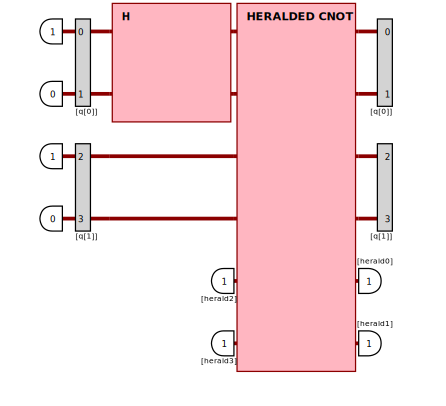

In [4]:
r = perceval_processor.probs()['results']
print('results:', r)
pdisplay(perceval_processor)

The 1.0 version of cQASM is also supported, as shown in the example below.


In [5]:
# version 1.0
cqasm_program = f"""
version 1.0

# a basic cQASM example
qubits 2

.prepare
prep_z q[0:1]

.entangle
H q[0]
CNOT q[0], q[1]

.measurement
measure_all
"""

results: {
	|1,0,1,0>: 0.5000000000000002
	|0,1,0,1>: 0.4999999999999999
}


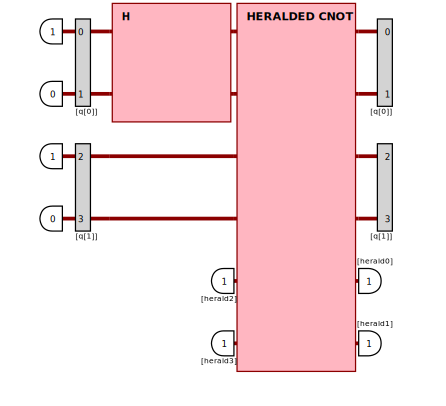

In [6]:
perceval_processor = CQASMConverter().convert(cqasm_program, use_postselection=False)

r = perceval_processor.probs()['results']
print('results:', r)
pdisplay(perceval_processor)

The cQASM program can also be retrieved from a file by using `CQASMConverter().convert(path_to_cqasm_program)`.